In [15]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [16]:
#opening the noresm data

#data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/remo/NorESM1/pr_WAS-22_NCC-NorESM1-M_historical_r1i1p1_GERICS-REMO2015_v1_day_1981-2005.nc')


data = xr.open_mfdataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/remo/NorESM1/all/pr_WAS-22_NCC-NorESM1-M_historical_r1i1p1_GERICS-REMO2015_v1_day_*.nc')


data

<xarray.Dataset>
Dimensions:                     (time: 9131, bnds: 2, rlat: 255, rlon: 385,
                                 vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 1981-01-01T12:00:00 ......
  * rlat                        (rlat) float64 -21.23 -21.01 ... 34.43 34.65
  * rlon                        (rlon) float64 -32.23 -32.01 ... 52.03 52.25
    lat                         (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
    lon                         (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] dask.array<chunksize=(1826, 2), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    lat_vertices                (time, rlat, rlon, vertices) float32 dask.array<chunksize=(1826, 255, 385, 4), meta=np.ndarray>
    lon_vertices                (time, rlat, rlon, vertices) float32 dask.array<chunksize=(1826, 255, 385, 4), meta=np.ndarray>
    pr                          (time, rlat, rlon) float32 dask.array<chunksize=(1826, 255, 385), meta=np.ndarray>
Attributes: (12/34)
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    experiment_id:                  historical
    source:                         GERICS-REMO2015
    model_id:                       GERICS-REMO2015
    forcing:                        N/A
    ...                             ...
    title:                          GERICS-REMO2015 model output prepared for...
    parent_experiment:              N/A
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    tracking_id:                    hdl:21.14103/a5bf17ab-c247-4be0-a27e-06f8...

In [17]:
#to select the year from 1980 to 2015
#data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
#data

In [18]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset>
Dimensions:                     (time: 3050, bnds: 2, rlat: 255, rlon: 385,
                                 vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 1981-06-01T12:00:00 ......
  * rlat                        (rlat) float64 -21.23 -21.01 ... 34.43 34.65
  * rlon                        (rlon) float64 -32.23 -32.01 ... 52.03 52.25
    lat                         (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
    lon                         (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] dask.array<chunksize=(610, 2), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    lat_vertices                (time, rlat, rlon, vertices) float32 dask.array<chunksize=(610, 255, 385, 4), meta=np.ndarray>
    lon_vertices                (time, rlat, rlon, vertices) float32 dask.array<chunksize=(610, 255, 385, 4), meta=np.ndarray>
    pr                          (time, rlat, rlon) float32 dask.array<chunksize=(610, 255, 385), meta=np.ndarray>
Attributes: (12/34)
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    experiment_id:                  historical
    source:                         GERICS-REMO2015
    model_id:                       GERICS-REMO2015
    forcing:                        N/A
    ...                             ...
    title:                          GERICS-REMO2015 model output prepared for...
    parent_experiment:              N/A
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    tracking_id:                    hdl:21.14103/a5bf17ab-c247-4be0-a27e-06f8...

In [19]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [20]:
#data["pr"]["y"][287:337].values

In [21]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [22]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (rlat: 255, rlon: 385)>
dask.array<mean_agg-aggregate, shape=(255, 385), dtype=float32, chunksize=(255, 385), chunktype=numpy.ndarray>
Coordinates:
  * rlat     (rlat) float64 -21.23 -21.01 -20.79 -20.57 ... 34.21 34.43 34.65
  * rlon     (rlon) float64 -32.23 -32.01 -31.79 -31.57 ... 51.81 52.03 52.25
    lat      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
    lon      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [23]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (rlat: 255, rlon: 385)>
dask.array<mul, shape=(255, 385), dtype=float64, chunksize=(255, 385), chunktype=numpy.ndarray>
Coordinates:
  * rlat     (rlat) float64 -21.23 -21.01 -20.79 -20.57 ... 34.21 34.43 34.65
  * rlon     (rlon) float64 -32.23 -32.01 -31.79 -31.57 ... 51.81 52.03 52.25
    lat      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
    lon      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>

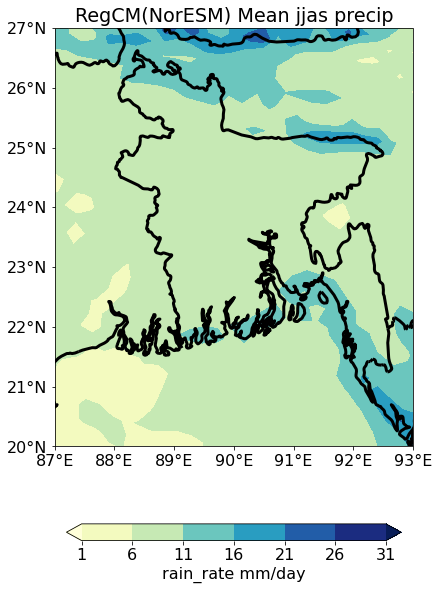

In [24]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('RegCM(NorESM) Mean jjas precip')
 

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_remo_noresm_jjas_mean.png")




Now I will plot the annual precipitation rate in mm/day

In [25]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (rlat: 255, rlon: 385)>
dask.array<mean_agg-aggregate, shape=(255, 385), dtype=float32, chunksize=(255, 385), chunktype=numpy.ndarray>
Coordinates:
  * rlat     (rlat) float64 -21.23 -21.01 -20.79 -20.57 ... 34.21 34.43 34.65
  * rlon     (rlon) float64 -32.23 -32.01 -31.79 -31.57 ... 51.81 52.03 52.25
    lat      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
    lon      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>

In [26]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (rlat: 255, rlon: 385)>
dask.array<mul, shape=(255, 385), dtype=float64, chunksize=(255, 385), chunktype=numpy.ndarray>
Coordinates:
  * rlat     (rlat) float64 -21.23 -21.01 -20.79 -20.57 ... 34.21 34.43 34.65
  * rlon     (rlon) float64 -32.23 -32.01 -31.79 -31.57 ... 51.81 52.03 52.25
    lat      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>
    lon      (rlat, rlon) float32 dask.array<chunksize=(255, 385), meta=np.ndarray>

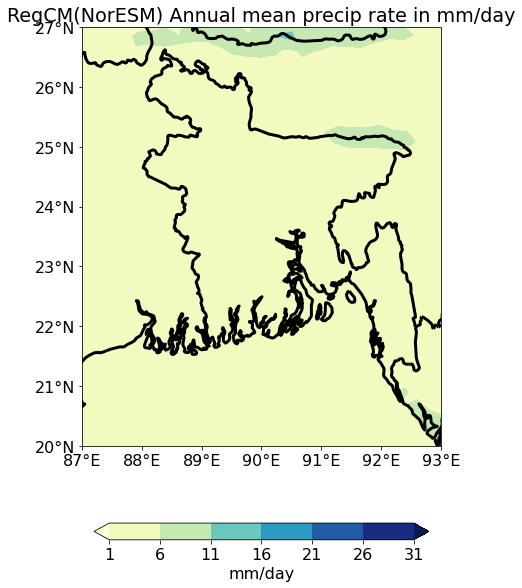

In [27]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#ax.add_feature(cfeature.STATES)
#plt.title('RegCM(NorESM1-M) Annual mean precip rate in mm/day',fontweight='bold',fontsize=15)

plt.title('RegCM(NorESM) Annual mean precip rate in mm/day')


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_remo_noresm_annual_mean.png")


